Activity Description

Jio fibre wants to implement AI/ML in their systems. The activity task is to build a network intrusion detector, a predictive model capable of
distinguishing between ``bad&#39;&#39; connections, called intrusions or attacks, and ``good&#39;&#39; normal connections. This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment. Your target is building a machine efficient learning model using probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class classification. Fine tune the model and make a model which has at
least 97 percent accuracy

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt=pd.read_csv(r'C:\Users\DELL\Downloads\tcp-connection (1).csv')

In [4]:
dt

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,5,0.02,0.08,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'
494017,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
494018,0,b'tcp',b'smtp',b'SF',2152,327,0,0,0,0,...,123,0.91,0.02,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
494019,0,b'tcp',b'http',b'SF',283,1270,0,0,0,0,...,255,1.00,0.00,0.14,0.06,0.0,0.0,0.0,0.0,b'normal.'


In [5]:
dt.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serrer_rate          

Here 3 of them are object

In [6]:
dt.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serrer_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In the given data there is no null value present.

In [7]:
dt.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
dt.value_counts('intrusion')

intrusion
b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
dtype: int64

# Exploratory data analysis

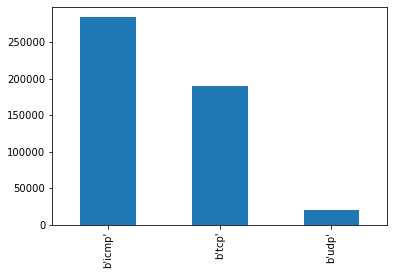

In [9]:
def bar_graph(feature):
    dt[feature].value_counts().plot(kind="bar")
bar_graph('protocol_type')

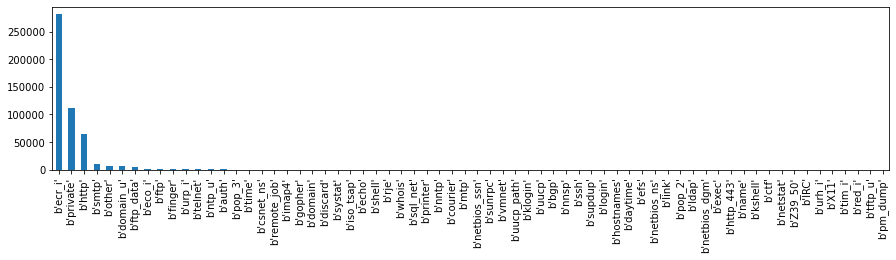

In [10]:
plt.figure(figsize=(15,3))
bar_graph('service')

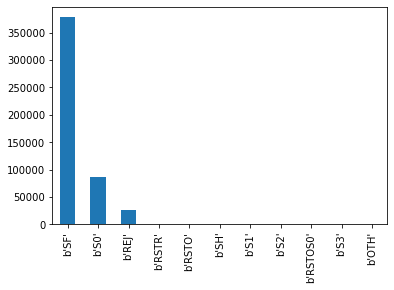

In [11]:
bar_graph('flag')

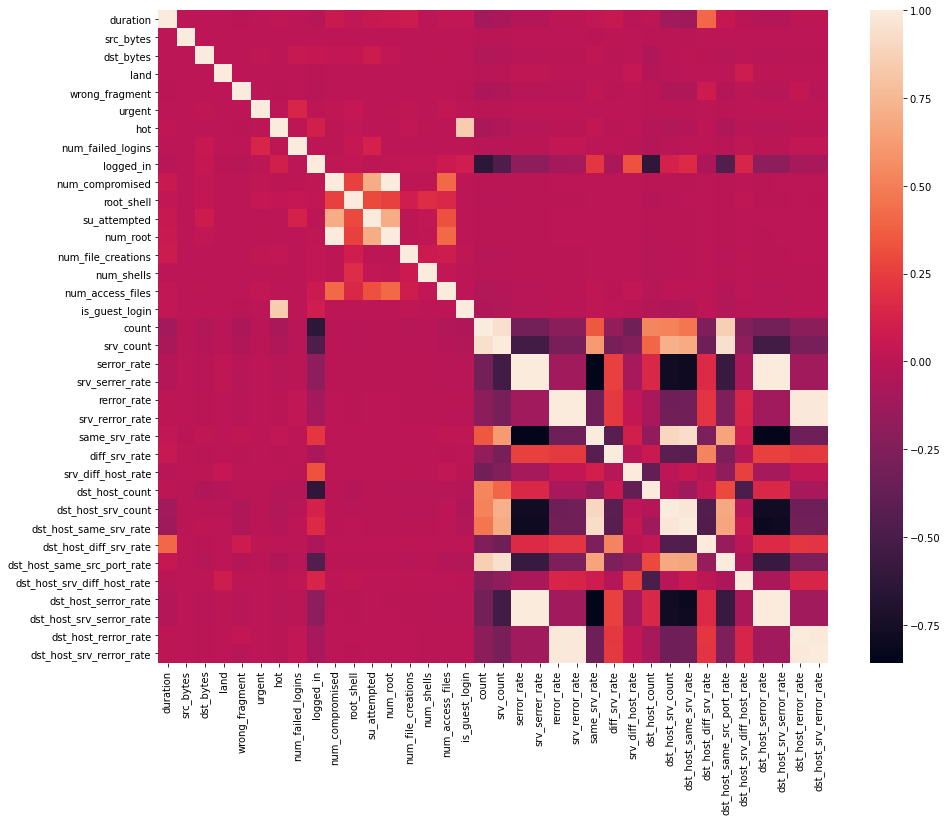

In [12]:
dt = dt[[col for col in dt if dt[col].nunique() > 1]]# keep columns where there are more than 1 unique values
corr = dt.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

# Data preprocessing

In [13]:
dt.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

# Label encoding 

In [14]:
dt['protocol_type'].unique()

array(["b'udp'", "b'tcp'", "b'icmp'"], dtype=object)

In [15]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
dt['protocol_type']=le.fit_transform(dt['protocol_type'])
dt['protocol_type'].unique()

array([2, 1, 0])

In [16]:
dt['service'].unique()

array(["b'domain_u'", "b'smtp'", "b'ecr_i'", "b'private'", "b'http'",
       "b'auth'", "b'ftp_data'", "b'other'", "b'eco_i'", "b'finger'",
       "b'uucp'", "b'name'", "b'ftp'", "b'ssh'", "b'vmnet'",
       "b'remote_job'", "b'urp_i'", "b'hostnames'", "b'kshell'",
       "b'time'", "b'supdup'", "b'ctf'", "b'telnet'", "b'link'",
       "b'systat'", "b'sql_net'", "b'printer'", "b'ntp_u'", "b'exec'",
       "b'whois'", "b'netbios_ssn'", "b'csnet_ns'", "b'domain'",
       "b'shell'", "b'iso_tsap'", "b'daytime'", "b'netbios_ns'",
       "b'imap4'", "b'gopher'", "b'nntp'", "b'pop_3'", "b'mtp'",
       "b'netbios_dgm'", "b'http_443'", "b'efs'", "b'pop_2'", "b'X11'",
       "b'login'", "b'echo'", "b'uucp_path'", "b'klogin'", "b'Z39_50'",
       "b'rje'", "b'courier'", "b'nnsp'", "b'discard'", "b'ldap'",
       "b'IRC'", "b'netstat'", "b'bgp'", "b'sunrpc'", "b'urh_i'",
       "b'tim_i'", "b'tftp_u'", "b'red_i'", "b'pm_dump'"], dtype=object)

In [17]:
dt['service']=le.fit_transform(dt['service'])
dt['service'].unique()

array([11, 50, 14, 45, 22,  3, 19, 40, 13, 17, 62, 32, 18, 52, 64, 47, 61,
       21, 27, 59, 54,  7, 56, 29, 55, 51, 44, 39, 16, 65, 35,  6, 10, 49,
       25,  8, 34, 24, 20, 38, 43, 31, 33, 23, 15, 42,  1, 30, 12, 63, 26,
        2, 48,  5, 37,  9, 28,  0, 36,  4, 53, 60, 58, 57, 46, 41])

In [18]:
dt['flag'].unique()

array(["b'SF'", "b'S0'", "b'REJ'", "b'RSTR'", "b'RSTO'", "b'SH'", "b'S1'",
       "b'S3'", "b'S2'", "b'RSTOS0'", "b'OTH'"], dtype=object)

In [19]:
dt['flag']=le.fit_transform(dt['flag'])
dt['flag'].unique()

array([ 9,  5,  1,  4,  2, 10,  6,  8,  7,  3,  0])

# splitting the data

In [20]:
x=dt.drop(['intrusion'],axis=1)
y=dt['intrusion']

# Training and testing the data

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Applying Gaussian naive bayes algorithm

In [22]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9476241080916957

# Applying Bernoulli naive bayes algorithm

In [24]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred1=bnb.predict(x_test)

In [25]:
accuracy_score(y_test,y_pred1)

0.9911644147563382

On applying bernoulli naive bayes data gives an accuracy of 99.11%.So it is the best fitting model for the given dataset.